In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
r = 0.6
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo

In [ ]:
def trial_line():
    plots.figure(figsize=(7,7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x_demo, y_demo, s=10)
    #plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
    plots.plot([-4,4],[-4,4], color='r', lw=2)
    #plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.xlabel('x in standard units')
    plots.ylabel('y in standard units');

In [ ]:
def trial_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)

In [ ]:
def both_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)

In [ ]:
def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.figure(figsize=(7, 7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x, y, s=10)
    plots.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plots.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plots.plot([-4,4], [4,-4], lw=2, color='r')

## Prediction ##

#### Watch Demo Video Below

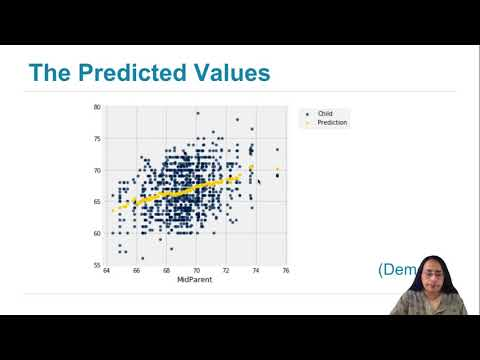

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('ojod4DTcFdA', width=800, height=300)

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [ ]:
galton = Table.read_table('galton.csv')

heights = Table().with_column(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [ ]:
heights

In [ ]:
heights.scatter('MidParent')

In [ ]:
def predict_child(x):
    chosen = heights.where('MidParent', are.between(x - 0.5, x + 0.5))
    return np.average(chosen.column('Child'))

In [ ]:
predictions = heights.apply(predict_child, 'MidParent')

In [ ]:
heights = heights.with_column(
    'Original Prediction', predictions
)

In [ ]:
heights

In [ ]:
heights.scatter('MidParent')

## Linear Regression ##

#### Watch Demo Video Below

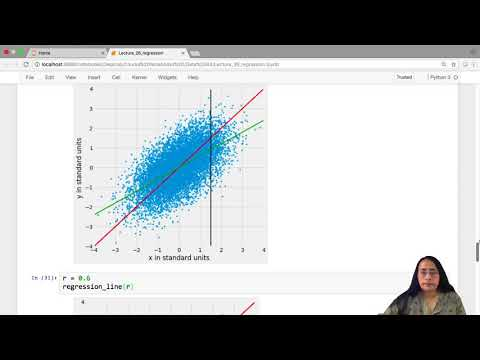

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('DS95QoflalM', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
trial_line()

In [ ]:
trial_with_vertical()

In [ ]:
both_with_vertical()

In [ ]:
r = 0.7
regression_line(r)

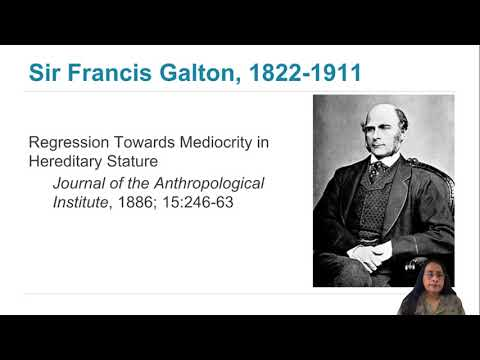

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('1-5HJ4cGhBI', width=800, height=300)

## Equation of the Regression Line ##

#### Watch Demo Video Below

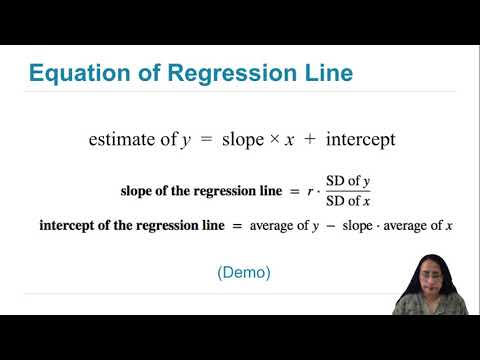

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('0FR1WREFMb4', width=800, height=300)

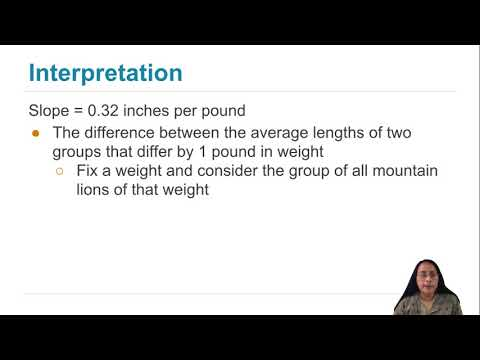

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Vf2f50AHPGc', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
def standard_units(x):
    return (x - np.average(x))/np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.average(x_su * y_su)

def slope(t, x, y):
    r = correlation(t, x, y)
    return r * np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    a = slope(t, x, y)
    return np.average(t.column(y)) - a*np.average(t.column(x))

In [ ]:
heights

In [ ]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

In [ ]:
heights.take(123)

In [ ]:
galton_slope * 69.48 + galton_intercept

In [ ]:
def fitted_values(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

In [ ]:
regression_predictions = fitted_values(heights, 'MidParent', 'Child')

In [ ]:
heights = heights.with_column(
    'Regression Prediction', regression_predictions
)

In [ ]:
heights

In [ ]:
heights.scatter('MidParent')